IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.shape, test.shape

((12632, 49), (6222, 48))

In [4]:
train.head(3)

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484


In [5]:
test.tail(2)

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
6220,ID_zy9Cfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
6221,ID_zyAFd7,1,7058.172796,7078.973345,7052.332304,473093253.0,1.275507e+11,954.0,672.0,20.0,...,1.0,858.0,2.0,1.0,1.0,NaN,NaN,3469,-3.289226,1.926557e+11


In [6]:
train.asset_id.unique()

array([1])

In [7]:
cols = ['id', 'asset_id']
train.drop(cols, axis=1, inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   open                     8617 non-null   float64
 1   high                     8617 non-null   float64
 2   low                      8617 non-null   float64
 3   volume                   8605 non-null   float64
 4   market_cap               8379 non-null   float64
 5   url_shares               8575 non-null   float64
 6   unique_url_shares        8575 non-null   float64
 7   reddit_posts             12391 non-null  float64
 8   reddit_posts_score       12391 non-null  float64
 9   reddit_comments          12402 non-null  float64
 10  reddit_comments_score    12402 non-null  float64
 11  tweets                   8584 non-null   float64
 12  tweet_spam               8584 non-null   float64
 13  tweet_followers          8574 non-null   float64
 14  tweet_quotes          

In [9]:
train.describe()

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
count,8617.000000,8617.000000,8617.000000,8.605000e+03,8.379000e+03,8575.000000,8575.000000,12391.000000,12391.000000,12402.000000,...,8107.000000,8107.000000,8107.000000,8107.000000,2950.000000,4786.000000,12632.000000,8313.000000,8.351000e+03,8617.000000
mean,15504.816128,15559.484568,15449.591187,1.300724e+09,2.826010e+11,1247.310437,757.862857,36.527722,323.989831,101.397436,...,809.518811,2.128037,1.018749,1.005921,1.349492,3.138947,3920.713268,0.375253,4.616824e+11,15507.395867
std,14105.710063,14191.106378,14022.651911,1.711922e+09,2.663052e+11,593.108269,303.627395,31.610276,677.419559,89.474521,...,225.420505,0.432902,0.135646,0.076723,0.868552,5.470365,4824.053810,3.745955,4.597152e+11,14112.405285
min,4545.087790,4589.712024,4267.292258,2.373622e+08,8.393765e+10,2.000000,2.000000,1.000000,0.000000,1.000000,...,124.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-44.690403,1.223398e+11,4267.292258
25%,8405.552062,8437.391908,8378.513061,6.196589e+08,1.506098e+11,857.000000,559.000000,13.000000,79.000000,41.000000,...,661.000000,2.000000,1.000000,1.000000,1.000000,1.000000,243.000000,-1.252658,2.265741e+11,8402.681367
50%,9671.831848,9689.751652,9648.410207,9.820621e+08,1.755833e+11,1124.000000,703.000000,28.000000,156.000000,65.000000,...,819.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3334.000000,0.240354,2.716129e+11,9667.590065
75%,13077.201438,13089.839678,13047.114786,1.611974e+09,2.191438e+11,1507.500000,893.000000,50.000000,328.000000,142.000000,...,970.000000,2.000000,1.000000,1.000000,1.000000,3.000000,5178.000000,1.867715,3.788975e+11,13066.731701
max,61408.929761,61507.371480,61073.192884,5.185678e+10,1.140905e+12,10107.000000,4880.000000,500.000000,30559.000000,1333.000000,...,1490.000000,10.000000,2.000000,2.000000,12.000000,178.000000,140431.000000,34.932303,2.062215e+12,61259.670876


## Prerocessing

In [10]:
train.drop_duplicates()

,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,61.0,138.0,...,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN
12628,7294.506136,7306.701928,7292.729876,3.816704e+08,1.322473e+11,605.0,462.0,16.0,217.0,39.0,...,1007.0,2.0,1.0,1.0,NaN,NaN,2020,NaN,1.978198e+11,7303.640282
12629,8811.121632,8832.560173,8754.602574,2.412260e+09,1.621298e+11,1653.0,757.0,74.0,249.0,60.0,...,918.0,2.0,1.0,1.0,1.0,2.0,5787,NaN,2.493421e+11,8828.440234
12630,9661.514681,9662.196605,9645.133934,9.861517e+08,1.774933e+11,1376.0,657.0,39.0,81.0,43.0,...,603.0,2.0,1.0,1.0,NaN,9.0,4679,2.706432,2.757547e+11,9658.204385


<AxesSubplot:xlabel='high', ylabel='low'>

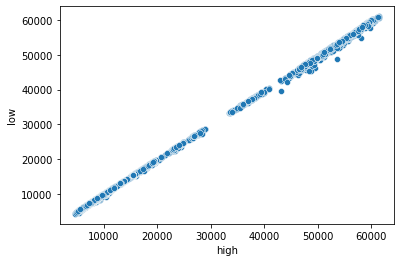

In [86]:
fig, ax = plt.subplots()
sns.scatterplot(x='high', y='low', data=train)
# ax.set_ylabel('close')

In [11]:
for col in train.columns:
    train[col] = train[col].fillna(train[col].mean())

In [ ]:
train.isna().any()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)

In [88]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components=22, svd_solver='full')
train_scaled = pca.fit_transform(train_scaled)

In [90]:
X, y = train_scaled[:,:-1], train_scaled[:,-1:]

In [91]:
X.shape, y.shape

((12632, 21), (12632, 1))

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

### SGDRegressor

In [93]:
#SGD Regression
sgd_reg = SGDRegressor(loss='squared_loss', l1_ratio=0.16, penalty='elasticnet', learning_rate='optimal')
sgd_reg.fit(X_train, y_train.ravel())

SGDRegressor(l1_ratio=0.16, learning_rate='optimal', penalty='elasticnet')

In [94]:
sgd_preds = sgd_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, sgd_preds)))

1014531043245.1576


In [ ]:
test.drop(['id', 'asset_id'], axis=1, inplace=True)

In [21]:
test = test.fillna(0)

In [67]:
sgd_test_preds = sgd_reg.predict(test)


### Linear Regression

In [95]:
reg = LinearRegression(n_jobs=-1)

cross_val_score(reg, X, y, cv=5, scoring='neg_root_mean_squared_error')

array([-0.72344205, -0.85394099, -0.75036599, -0.90087497, -0.83661981])

In [96]:
reg.fit(X_train, y_train.ravel())

print(np.sqrt(mean_squared_error(reg.predict(X_test), y_test)))

0.9186540365848209


In [99]:
lin_preds = reg.predict(test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 21 is different from 46)

### Submission

In [24]:
ss = pd.read_csv('SampleSubmission.csv')

In [78]:
sub_file = ss.copy()
sub_file.close = lin_preds
sub_file.to_csv('sub3.csv', index=False)

In [79]:
sub_file.head()

,id,close
0,ID_323Sn2,-4.190531e-03
1,ID_325SNW,1.187197e+09
2,ID_325uzE,4.893986e+08
3,ID_328qCx,-9.303707e-02
4,ID_3293uJ,-1.564026e-02
